# 📈 Simple Linear Regression on Synthetic Data

This notebook builds a *very clean* example of Linear Regression using **synthetic data**.

Here we **control** the relationship between `x` and `y`, so that a straight line is actually the right model.

Later, we can compare this with real-world datasets (like the Kaggle energy data) where things are more messy and nonlinear.


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

plt.style.use("seaborn-v0_8")


## 1. Generate synthetic linear data

We create a simple relationship:

\[
y = 4x + 10 + {noise}
\]

- `x` is between 0 and 10  
- `noise` is small random variation (normal distribution)  

In real life, we **don’t** know the true formula.  
Here, we do — so we can check how close Linear Regression gets.


In [20]:
np.random.seed(42)

# 100 data points between 0 and 10
X = np.linspace(0, 10, 100).reshape(-1, 1)

# True relationship: y = 4x + 10 + noise
true_slope = 4.0
true_intercept = 10.0
noise = np.random.normal(loc=0, scale=2, size=100)  # small noise

y = true_slope * X.flatten() + true_intercept + noise

df_syn = pd.DataFrame({"x": X.flatten(), "y": y})
df_syn.head()


,x,y
0,0.00000,10.993428
1,0.10101,10.127512
2,0.20202,12.103458
3,0.30303,14.258181
4,0.40404,11.147855


## 2. Visualise the synthetic data

If Linear Regression is a good idea, the points should roughly form a **slanted cloud** that looks like it could be approximated by a straight line.

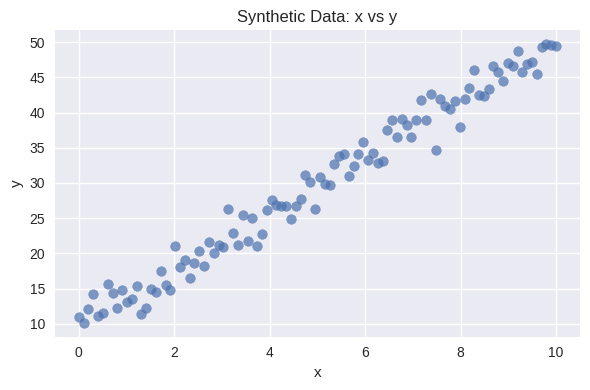

In [21]:
plt.figure(figsize=(6, 4))
plt.scatter(df_syn["x"], df_syn["y"], alpha=0.7)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Synthetic Data: x vs y")
plt.tight_layout()
plt.show()

## 3. Fit a Linear Regression model

Now we use scikit-learn’s `LinearRegression` to learn the best-fit line from the data.

We will then compare:

- learned slope vs true slope (4.0)  
- learned intercept vs true intercept (10.0)  
- MAE / RMSE to see how small the errors are  


In [22]:
model = LinearRegression()
model.fit(X, y)

preds = model.predict(X)

mae = mean_absolute_error(y, preds)
rmse = np.sqrt(mean_squared_error(y, preds))

print("True slope:     ", true_slope)
print("Learned slope:  ", model.coef_[0])
print("True intercept: ", true_intercept)
print("Learned intercept:", model.intercept_)
print(f"MAE:  {mae:.3f}")
print(f"RMSE: {rmse:.3f}")

True slope:      4.0
Learned slope:   4.027586534673312
True intercept:  10.0
Learned intercept: 9.654374291845258
MAE:  1.430
RMSE: 1.805


## 4. Visualise the best-fit line

Now we draw:

- the original data points  
- the **predicted line** learned by Linear Regression  

If the model is a good fit, the line should:

- pass through the *middle* of the points  
- follow the same direction (upwards)  
- roughly match the true relationship we used to generate the data

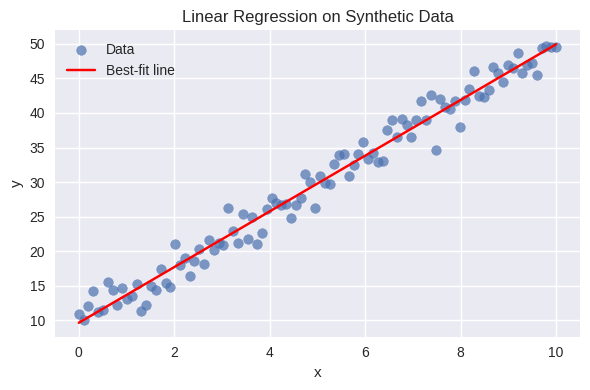

In [23]:
plt.figure(figsize=(6, 4))

# scatter of actual points
plt.scatter(df_syn["x"], df_syn["y"], alpha=0.7, label="Data")

# line of predictions
x_line = np.linspace(0, 10, 100).reshape(-1, 1)
y_line = model.predict(x_line)
plt.plot(x_line, y_line, "r-", label="Best-fit line")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression on Synthetic Data")
plt.legend()
plt.tight_layout()
plt.show()

### 🔍 Why this works so well

Here, Linear Regression performs **very well** because:

1. We *designed* the data to follow a **linear relationship**  
   \[
   y = 4x + 10 + \text{small noise}
   \]

2. The noise is small, so points stay close to the true line.  
3. We only have one feature (`x`), so the model just needs to learn **one slope and one intercept**.

That’s why:

- the learned slope and intercept are very close to the true values  
- MAE and RMSE are low  
- the red line passes nicely through the centre of the data cloud  

This is the “textbook” case where Linear Regression is the right tool.

Later, when we go back to real-world datasets (like energy usage),  
we’ll see that **the same model** struggles because:

- relationships are no longer purely linear  
- there are many features  
- human behaviour and device cycles add complex patterns

This contrast is super useful for learning:

> Linear Regression is great when you have *roughly linear* relationships.  
> For more complex data, we need more powerful models and better features.
